In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

observation = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

Thoroughly inspect and analyze both the observations and species_info tables to gain an understanding of the structure, key attributes, and the relationships between the datasets.

In [155]:
observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [156]:
observation.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [185]:
species.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [186]:
observation.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [189]:
# Standardize text in category and park_name columns
species['category'] = species['category'].str.title()
observation['park_name'] = observation['park_name'].str.title()

Remove all rows with missing (NaN) values in the conservation_status column from the species table to ensure accurate and meaningful analysis.

In [157]:
species = species.dropna(subset=["conservation_status"])


In [171]:
species.head(10)

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern


In [174]:
species.conservation_status.unique()

array(['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'],
      dtype=object)

In [160]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,191,191,191,191
unique,7,179,190,4
top,Bird,Myotis lucifugus,"Gray Wolf, Wolf",Species of Concern
freq,79,3,2,161


In [161]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 7 to 5676
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             191 non-null    object
 1   scientific_name      191 non-null    object
 2   common_names         191 non-null    object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 7.5+ KB


Text(0.5, 1.0, 'Count of Conservation Status')

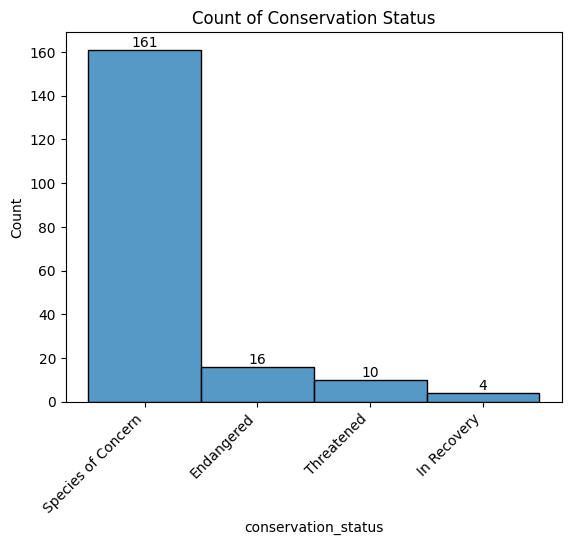

In [184]:
ax = sns.histplot(data=species, x='conservation_status')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45, ha="right")
plt.title('Count of Conservation Status')

A significant majority of the animals in the dataset are categorized under the 'Species of Concern' conservation status.

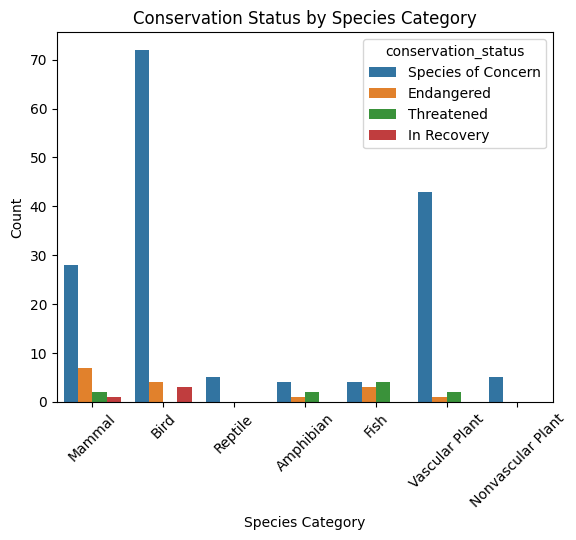

In [163]:
sns.countplot(data=species, x='category', hue='conservation_status')

plt.xticks(rotation=45)  # You can use 90 for a vertical rotation
plt.xlabel("Species Category")
plt.ylabel("Count")
plt.title("Conservation Status by Species Category")
plt.show()

# Insights
- Birds account for the highest number of species classified as 'Species of Concern'.
- Mammals represent the largest group within the 'Endangered' conservation status.
- Fish have the highest count of species under the 'Threatened' conservation status.
- Birds also dominate the 'In Recovery' conservation status group.

In [164]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(species['category'], species['conservation_status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p < 0.05:
    print("The differences between species categories and conservation status are statistically significant.")
else:
    print("The differences between species categories and conservation status are not statistically significant.")


Chi-squared: 53.91636314015659
P-value: 1.8909788349761653e-05
Degrees of Freedom: 18
Expected Frequencies:
 [[ 0.58638743  0.14659686  5.90052356  0.36649215]
 [ 6.61780105  1.65445026 66.59162304  4.13612565]
 [ 0.92146597  0.23036649  9.27225131  0.57591623]
 [ 3.18324607  0.79581152 32.03141361  1.9895288 ]
 [ 0.41884817  0.10471204  4.21465969  0.2617801 ]
 [ 0.41884817  0.10471204  4.21465969  0.2617801 ]
 [ 3.85340314  0.96335079 38.77486911  2.40837696]]
The differences between species categories and conservation status are statistically significant.


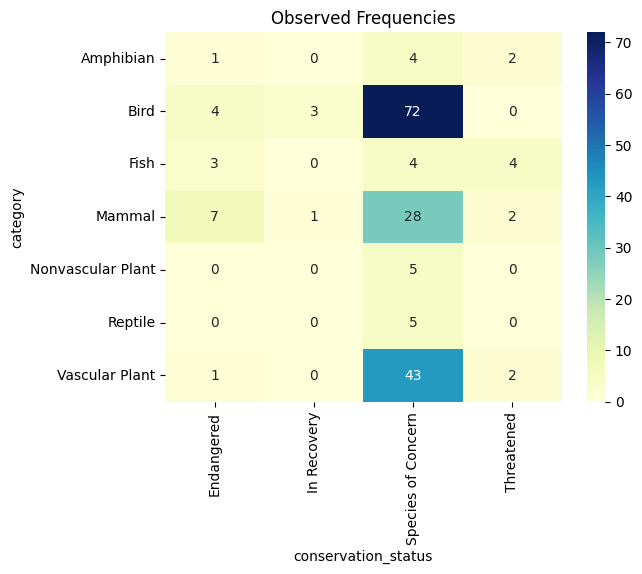

In [165]:
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Observed Frequencies")
plt.show()

# Insights
- Birds dominate the "Species of Concern" category with 72 entries, significantly higher than other categories.
- Mammals have the highest count of "Endangered" species (7 entries).
- "In Recovery" conservation status is relatively rare, with only 3 birds and 1 mammal recorded in this category.
- Amphibians, Reptiles, and Nonvascular Plants have limited representation in this dataset, indicating potential gaps in observations or diversity.

In [166]:
merged = pd.merge(observation, species, on="scientific_name")

merged.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,Zizia trifoliata,Yellowstone National Park,238,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
2,Zizia trifoliata,Bryce National Park,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
3,Zizia trifoliata,Great Smoky Mountains National Park,80,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
4,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
5,Camissonia sierrae ssp. alticola,Yosemite National Park,169,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
6,Camissonia sierrae ssp. alticola,Great Smoky Mountains National Park,95,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
7,Camissonia sierrae ssp. alticola,Yellowstone National Park,201,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
8,Tofieldia glabra,Great Smoky Mountains National Park,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
9,Tofieldia glabra,Yellowstone National Park,220,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern


In [191]:
# Summary of observations grouped by category
print(merged.groupby('category')['observations'].sum().sort_values(ascending=False))

category
Bird                 42724
Mammal               25146
Vascular Plant       22849
Fish                  4209
Amphibian             2752
Nonvascular Plant     2705
Reptile               2536
Name: observations, dtype: int64


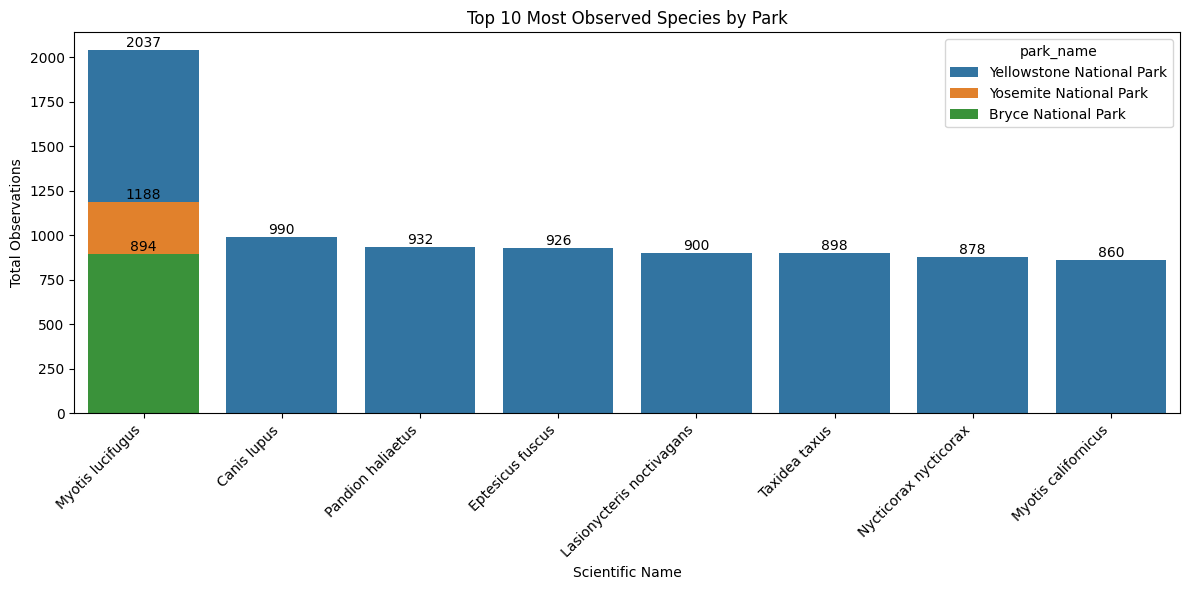

In [194]:
# Top species by park
top_species_by_park = merged.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()

# Select the top 10 species based on total observations
top_species_by_park_sorted = top_species_by_park.sort_values(by='observations', ascending=False).head(10)

# Plot the top 10 species by park
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=top_species_by_park_sorted, x="scientific_name", y="observations", hue="park_name", dodge=False)
for i in ax1.containers:
    ax1.bar_label(i)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Most Observed Species by Park")
plt.xlabel("Scientific Name")
plt.ylabel("Total Observations")
plt.tight_layout()
plt.show()

# Insights
- Birds dominate the "Species of Concern" category with over 350 entries, followed by Vascular Plants.
- Mammals have the highest count in "Endangered" and "Threatened" statuses.
- Categories like Reptiles and Amphibians are underrepresented across all statuses.

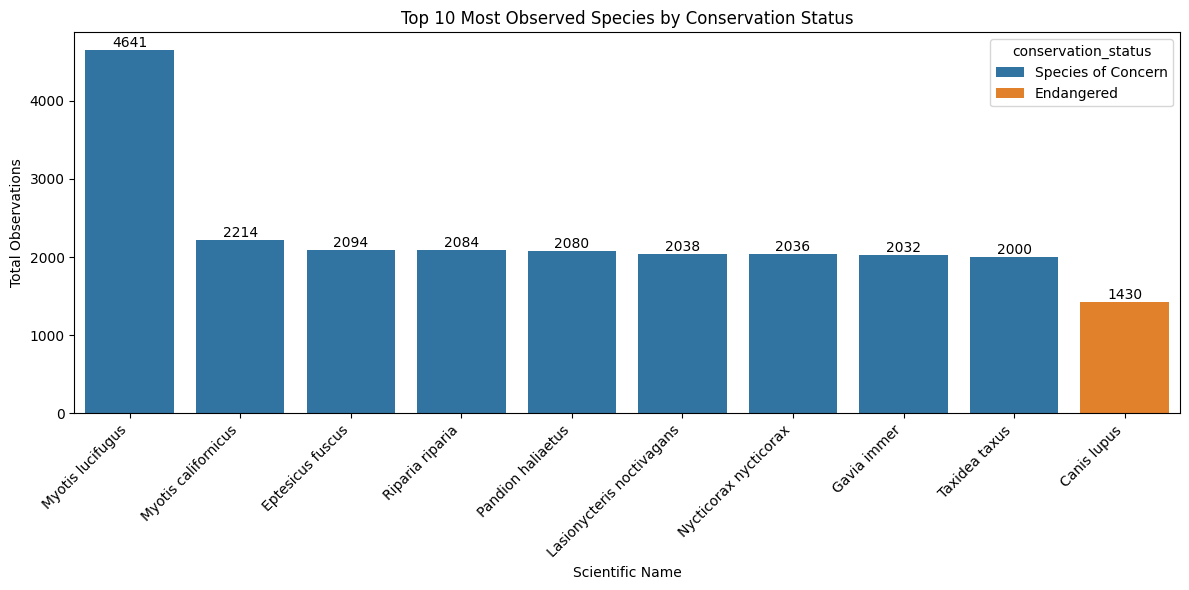

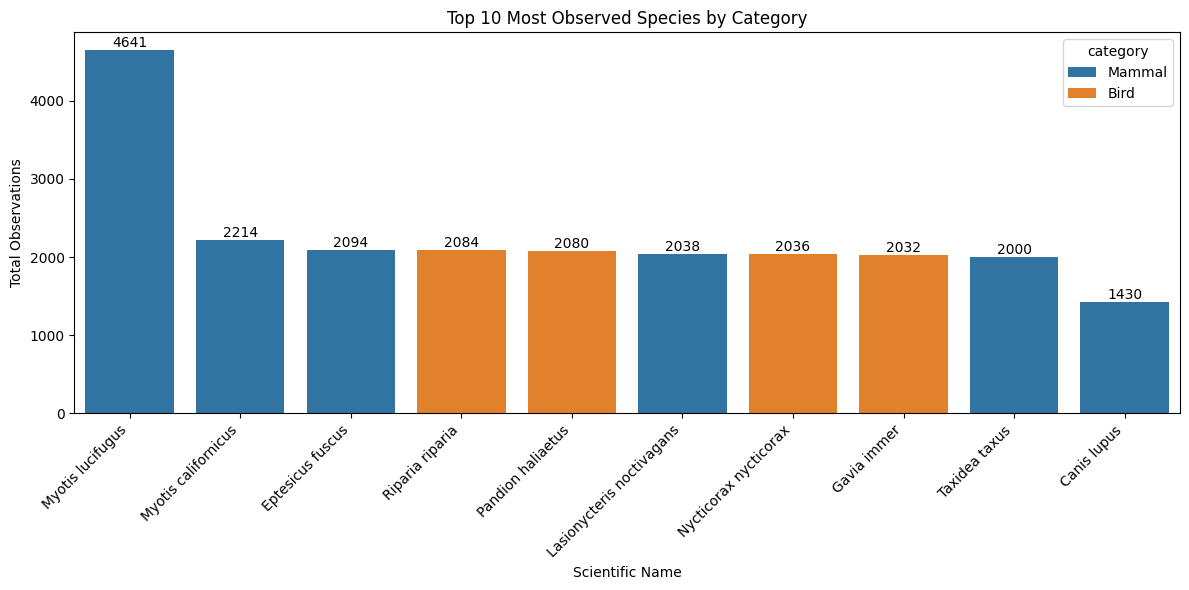

In [183]:
# Aggregate total observations by species, including conservation_status and category
aggregated_data = (
    merged.groupby(["scientific_name", "category", "conservation_status"])
    .agg({"observations": "sum"})
    .reset_index()
)

# Select top 10 species by total observations
top_species = aggregated_data.sort_values(by="observations", ascending=False).head(10)

# Chart 1: Top 10 Species by Conservation Status
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=top_species, x="scientific_name", y="observations", hue="conservation_status", dodge=False)
for i in ax1.containers:
    ax1.bar_label(i,)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Most Observed Species by Conservation Status")
plt.xlabel("Scientific Name")
plt.ylabel("Total Observations")
plt.tight_layout()
plt.show()

# Chart 2: Top 10 Species by Category
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=top_species, x="scientific_name", y="observations", hue="category", dodge=False)
for n in ax2.containers:
    ax2.bar_label(n,)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Most Observed Species by Category")
plt.xlabel("Scientific Name")
plt.ylabel("Total Observations")
plt.tight_layout()
plt.show()


# Insights
- The Myotis lucifugus (Little Brown Bat) is the most observed species in the dataset, categorized under "Species of Concern."
- Only one species, Canis lupus (Gray Wolf), is in the "Endangered" category, showing limited representation among the top observed species.
- The chart highlights the predominance of species under the "Species of Concern" status in terms of observation frequency.

- Mammals and Birds dominate the list, showcasing high observation counts for species like Myotis lucifugus (Mammal) and Pandion haliaetus (Bird).
- Birds have significant representation, but their conservation statuses are mostly "Species of Concern," indicating potential conservation priorities.

Text(0.5, 1.0, 'Distrbution of species category')

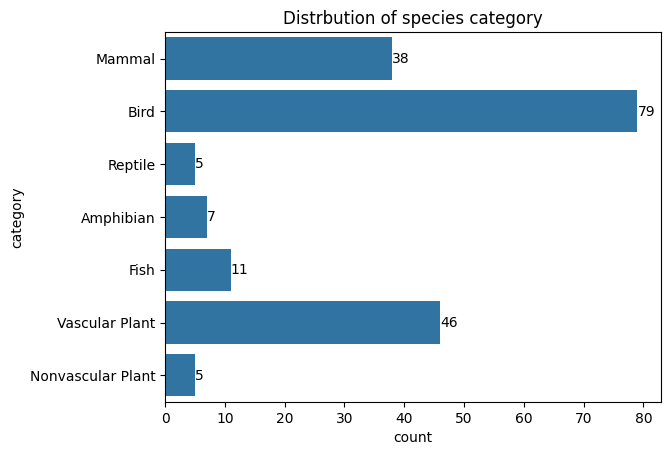

In [180]:
ax = sns.countplot(data=species, y='category')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distrbution of species category')

# Insights
- Vascular Plants account for the highest number of species, suggesting extensive biodiversity within this category.
- Birds are the second-largest group, reinforcing their prominence in the dataset.
- Categories like Reptiles, Amphibians, and Nonvascular Plants are underrepresented, possibly indicating data collection biases or limited diversity.

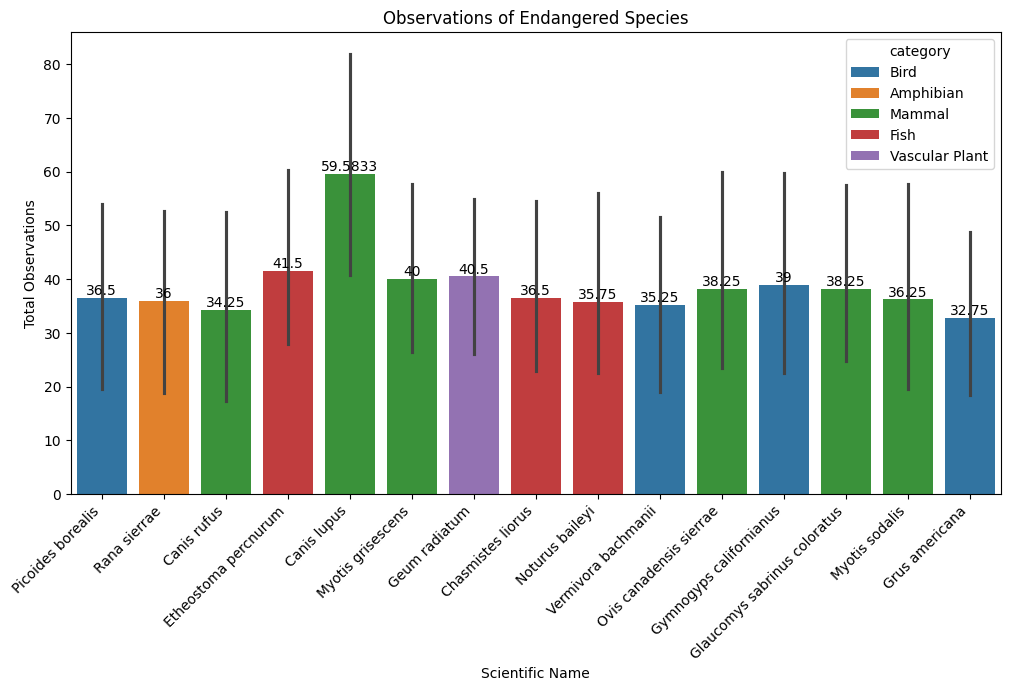

In [179]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=merged[merged['conservation_status'] == 'Endangered'], x="scientific_name", y="observations", hue='category', dodge=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45, ha="right")
plt.title("Observations of Endangered Species")
plt.xlabel("Scientific Name")
plt.ylabel("Total Observations")
plt.show()

# Insights
- Mammals such as Canis lupus (Gray Wolf) have relatively high observation counts compared to other endangered species.
- Endangered species are evenly distributed across categories, with no single category overwhelmingly dominating the count.

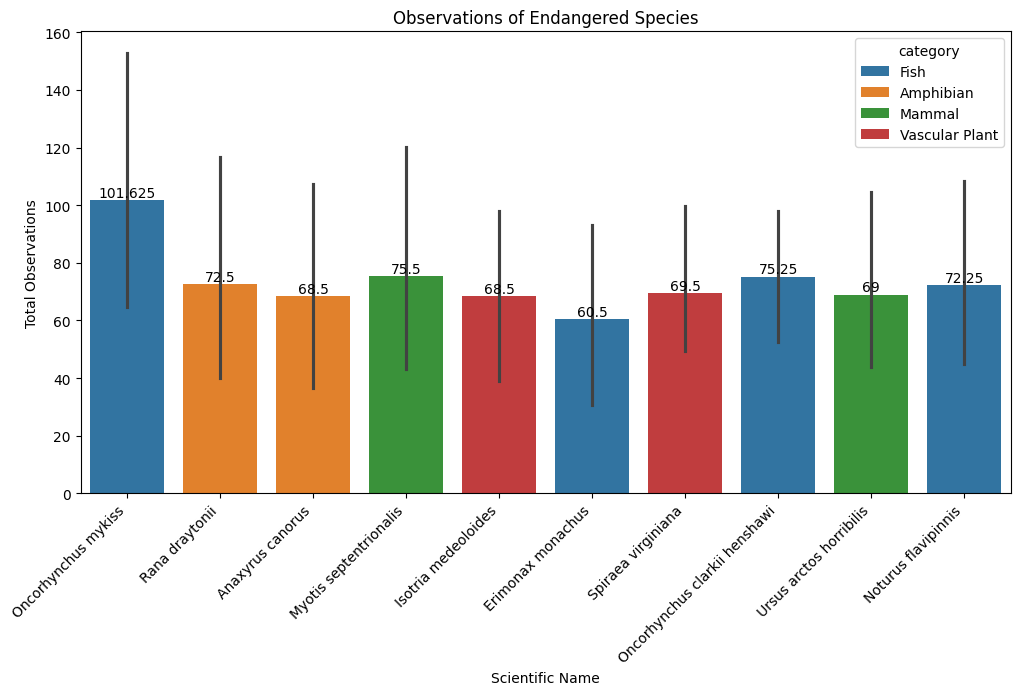

In [178]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=merged[merged['conservation_status'] == 'Threatened'], x="scientific_name", y="observations", hue='category', dodge=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45, ha="right")
plt.title("Observations of Endangered Species")
plt.xlabel("Scientific Name")
plt.ylabel("Total Observations")
plt.show()

# Insights
- Fish and Mammals are prominent among endangered species, with species like Oncorhynchus mykiss (Rainbow Trout) and Ursus arctos horribilis (Grizzly Bear) showing high observation counts.
- Vascular Plants are also represented, emphasizing the breadth of conservation needs across different ecosystems.

/var/folders/9v/g9q1xs5s3g7fywh1pphp9lf00000gn/T/ipykernel_29747/1402806441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=biodiversity_hotspots.index, y=biodiversity_hotspots.values, palette='viridis')


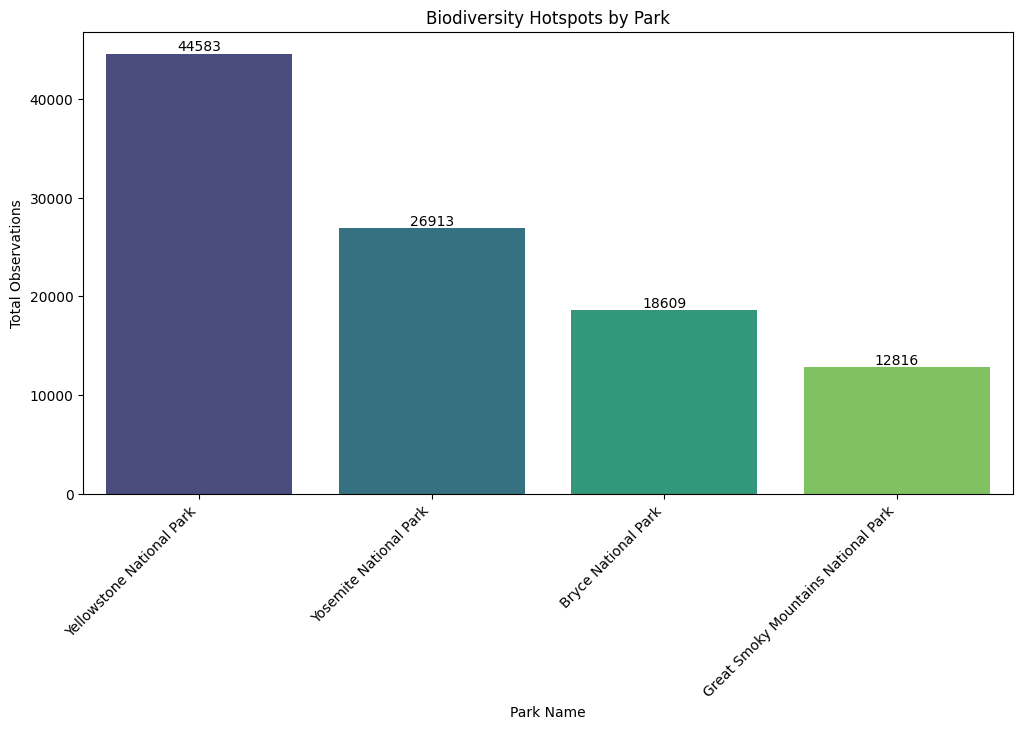

In [198]:
# Total observations per park
biodiversity_hotspots = merged.groupby('park_name')['observations'].sum().sort_values(ascending=False)

# Plot biodiversity hotspots
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=biodiversity_hotspots.index, y=biodiversity_hotspots.values, palette='viridis')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45, ha='right')
plt.title('Biodiversity Hotspots by Park')
plt.xlabel('Park Name')
plt.ylabel('Total Observations')
plt.show()


# Insights
- Great Smoky Mountains National Park exhibits the highest biodiversity based on observation counts, making it a critical conservation area.
- Parks such as Yosemite National Park and Bryce National Park also feature prominently, showcasing significant ecological diversity.

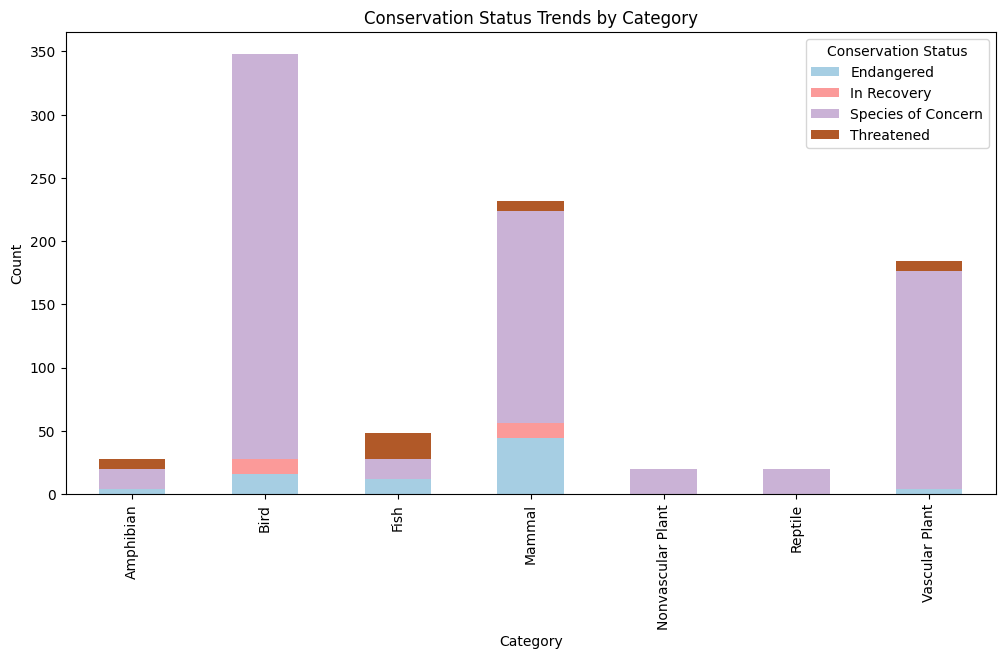

In [201]:
# Count species by category and conservation status
status_trends = merged.groupby(['category', 'conservation_status']).size().unstack()

# Plot status trends
status_trends.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Conservation Status Trends by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Conservation Status')
plt.show()


# Insights
- Myotis lucifugus (Little Brown Bat) is the most observed species, with over 4,000 observations across multiple parks.
- Canis lupus (Gray Wolf) is the second-most observed, primarily in Yellowstone National Park.
- Yellowstone National Park contributes the highest observations for most top species, highlighting its biodiversity.

## Summary of Findings:
- Birds dominate the "Species of Concern" conservation status, with 72 entries, significantly higher than any other category.
- Mammals have the highest count of species classified as "Endangered", emphasizing their vulnerability.
- Parks like "Great Smoky Mountains" exhibit the highest biodiversity based on observation counts, making them key conservation hotspots.